In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [208]:
df = pd.read_csv("C:/Users/karna/Downloads/z.csv")
df.head()

,Month,Sunspot
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [209]:
df.describe()

,Sunspot
count,2820.000000
mean,51.265957
std,43.448971
min,0.000000
25%,15.700000
50%,42.000000
75%,74.925000
max,253.800000


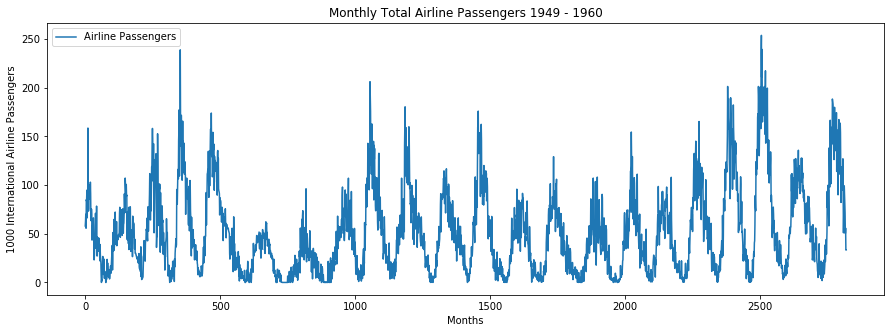

In [210]:
plt.figure(figsize = (15, 5))
plt.plot(df['Sunspot'], label = "Airline Passengers")
plt.xlabel("Months")
plt.ylabel("1000 International Airline Passengers")
plt.title("Monthly Total Airline Passengers 1949 - 1960")
plt.legend()
plt.show()

In [211]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
from statsmodels.tsa.stattools import acf,pacf

In [212]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
    plt.xlabel('Time in Years', fontsize = 10)
    plt.ylabel('Total Emissions', fontsize = 10)
    plt.legend(loc='best', fontsize = 10)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 25)
    plt.show(block= True)

In [213]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        

In [214]:
df1 = df.copy()
df1[df1.iloc[:,1]==0] = 1


In [215]:
any(df1.iloc[:,1]<=0)

False

(array([-2.        , -1.94936709, -1.89873418, -1.84810127, -1.79746835,
        -1.74683544, -1.69620253, -1.64556962, -1.59493671, -1.5443038 ,
        -1.49367089, -1.44303797, -1.39240506, -1.34177215, -1.29113924,
        -1.24050633, -1.18987342, -1.13924051, -1.08860759, -1.03797468,
        -0.98734177, -0.93670886, -0.88607595, -0.83544304, -0.78481013,
        -0.73417722, -0.6835443 , -0.63291139, -0.58227848, -0.53164557,
        -0.48101266, -0.43037975, -0.37974684, -0.32911392, -0.27848101,
        -0.2278481 , -0.17721519, -0.12658228, -0.07594937, -0.02531646,
         0.02531646,  0.07594937,  0.12658228,  0.17721519,  0.2278481 ,
         0.27848101,  0.32911392,  0.37974684,  0.43037975,  0.48101266,
         0.53164557,  0.58227848,  0.63291139,  0.6835443 ,  0.73417722,
         0.78481013,  0.83544304,  0.88607595,  0.93670886,  0.98734177,
         1.03797468,  1.08860759,  1.13924051,  1.18987342,  1.24050633,
         1.29113924,  1.34177215,  1.39240506,  1.4

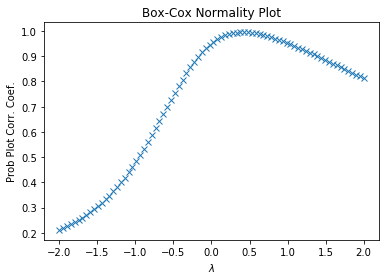

In [216]:
import scipy

fig,ax = plt.subplots()

scipy.stats.boxcox_normplot(df1.iloc[:,1], -2, 2, plot=ax, N=80)

In [217]:
dfnew = df1.iloc[:,1]**0.4

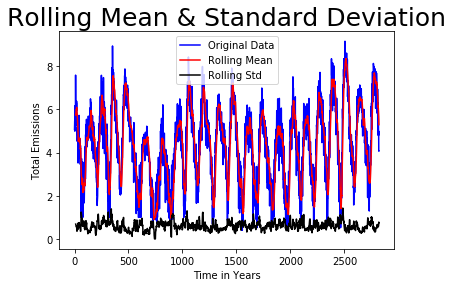

In [218]:
TestStationaryPlot(dfnew)

In [219]:
df = df.dropna()

In [220]:
TestStationaryAdfuller(dfnew)

Test Statistic                -9.324404e+00
p-value                        9.697661e-16
#Lags Used                     2.600000e+01
Number of Observations Used    2.793000e+03
Critical Value (1%)           -3.432693e+00
Critical Value (5%)           -2.862575e+00
Critical Value (10%)          -2.567321e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


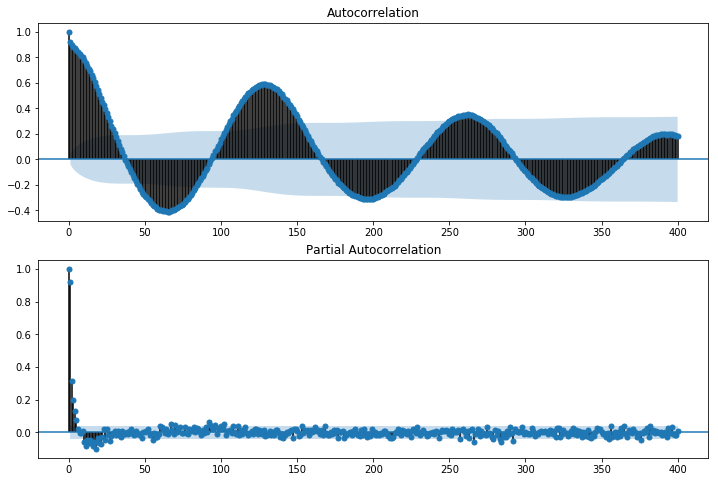

In [221]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dfnew, lags=400, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dfnew, lags=400, ax=ax2)


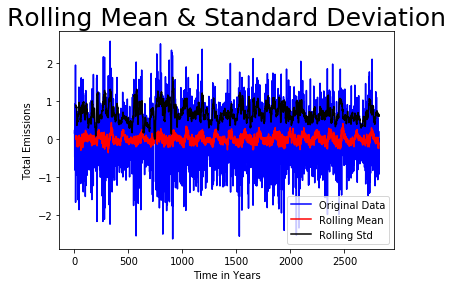

In [222]:
df_first_difference = dfnew - dfnew.shift(1)  
TestStationaryPlot(df_first_difference.dropna(inplace=False))

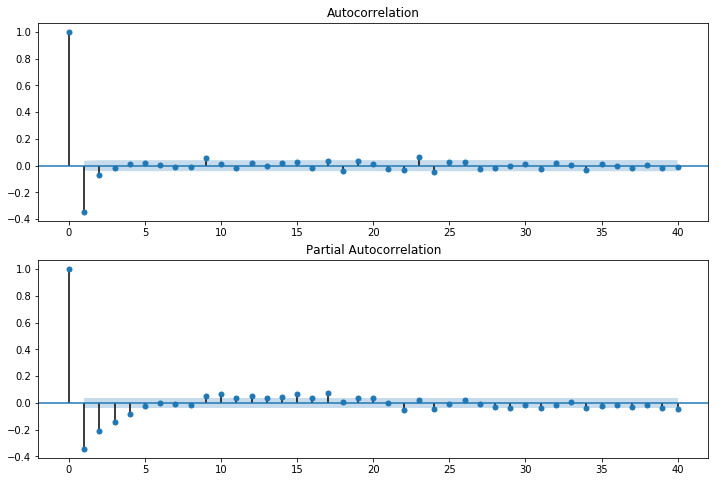

In [223]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_first_difference.dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_first_difference.dropna(), lags=40, ax=ax2)


In [224]:
TestStationaryAdfuller(df_first_difference.dropna())

Test Statistic                -8.600862e+00
p-value                        6.875187e-14
#Lags Used                     2.300000e+01
Number of Observations Used    2.795000e+03
Critical Value (1%)           -3.432692e+00
Critical Value (5%)           -2.862575e+00
Critical Value (10%)          -2.567321e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


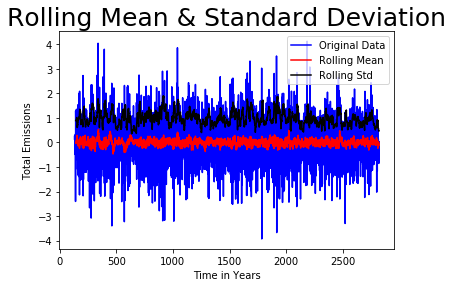

In [225]:
diff12 = df_first_difference - df_first_difference.shift(130)  
TestStationaryPlot(diff12.dropna(inplace=False))

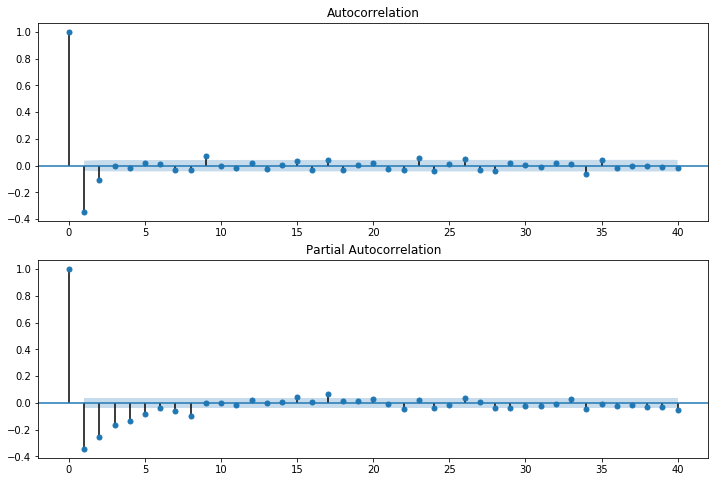

In [226]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff12.dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff12.dropna(), lags=40, ax=ax2)

In [227]:
TestStationaryAdfuller(diff12.dropna())

Test Statistic                -1.038793e+01
p-value                        2.056644e-18
#Lags Used                     2.800000e+01
Number of Observations Used    2.660000e+03
Critical Value (1%)           -3.432811e+00
Critical Value (5%)           -2.862627e+00
Critical Value (10%)          -2.567349e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


## Choose differencing

In [228]:
mod = sm.tsa.statespace.SARIMAX(dfnew[:2300].dropna(), 
                                order=(8,1,2),seasonal_order=(0,1,0,130),  
                                  
                                enforce_stationarity=True,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                  Statespace Model Results                                 
Dep. Variable:                             Sunspot   No. Observations:                 2300
Model:             SARIMAX(8, 1, 2)x(0, 1, 0, 130)   Log Likelihood               -2828.221
Date:                             Sun, 02 Dec 2018   AIC                           5678.443
Time:                                     18:37:15   BIC                           5740.945
Sample:                                          0   HQIC                          5701.298
                                            - 2300                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5979      0.249     -2.396      0.017      -1.087      -0.109
ar.L2         -0.4342      

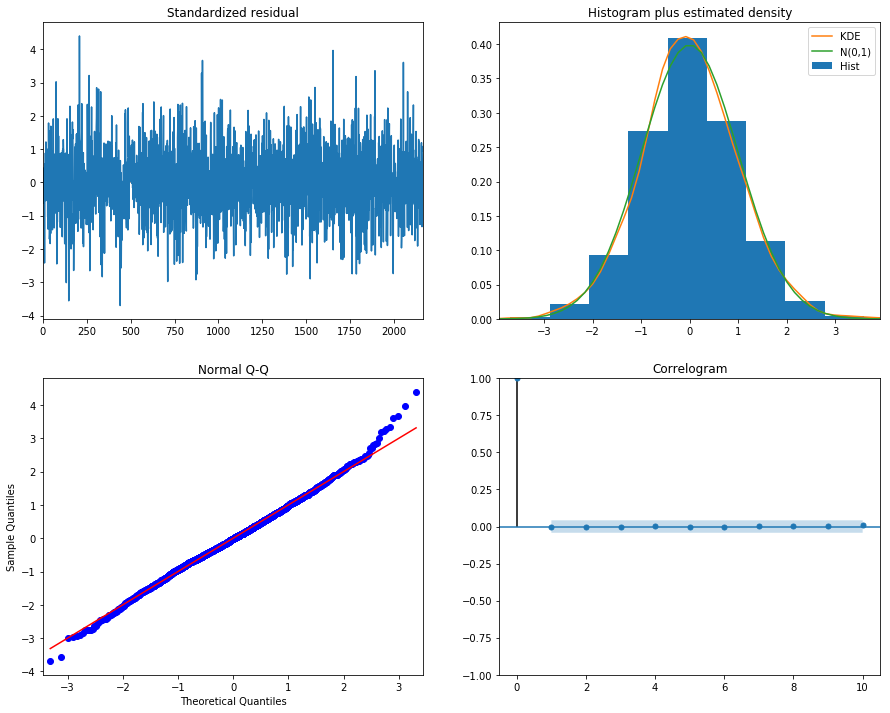

In [229]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [230]:
pred = results.get_prediction(start = 2300, end = 2821, dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

,lower Sunspot,upper Sunspot
2300,4.893234,8.386812
2301,5.253553,9.117677
2302,4.000024,8.056285
2303,3.458482,7.671724
2304,2.726239,7.070721


In [231]:
pred.predicted_mean

2300     6.640023
2301     7.185615
2302     6.028155
2303     5.565103
2304     4.898480
2305     4.975396
2306     4.937938
2307     4.612455
2308     4.262129
2309     4.406049
2310     4.768517
2311     4.877159
2312     4.945837
2313     4.442641
2314     3.688274
2315     5.268625
2316     4.664759
2317     4.731939
2318     4.371973
2319     3.746778
2320     3.902810
2321     3.558564
2322     4.016557
2323     3.280974
2324     3.995045
2325     3.932058
2326     3.479928
2327     3.340269
2328     3.397392
2329     3.397230
          ...    
2792    10.027030
2793     9.321700
2794    10.790226
2795     9.764273
2796     9.114121
2797     9.362500
2798     9.912118
2799     9.196836
2800     8.855148
2801     8.770737
2802     8.373471
2803     9.608962
2804     9.823995
2805     9.410439
2806     9.324262
2807     9.529187
2808     9.692005
2809     9.073480
2810     8.486469
2811     7.539586
2812     7.876535
2813     8.198587
2814     8.940567
2815     8.243143
2816     8

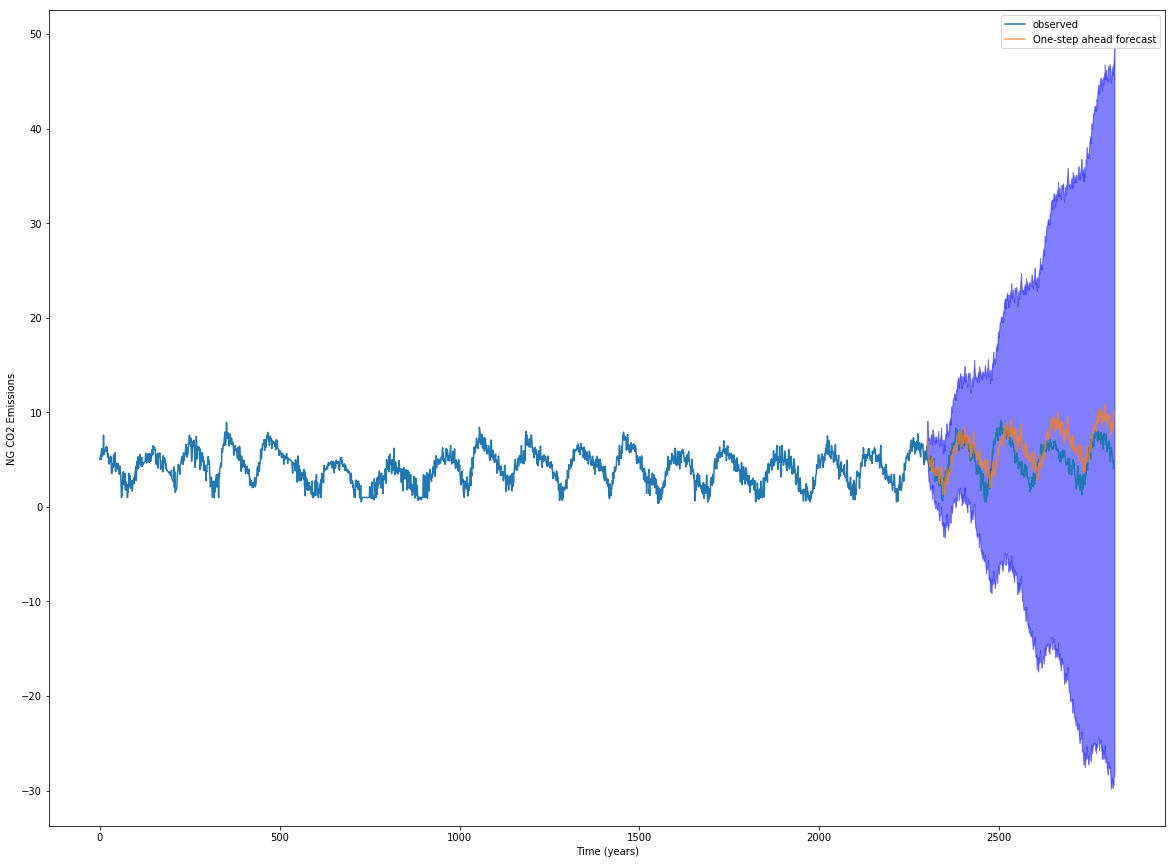

In [232]:
arima = dfnew.copy()

fig,axi = plt.subplots() 
fig.set_size_inches(20,15)
ax = arima.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='b', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('NG CO2 Emissions')
plt.legend()

plt.show()

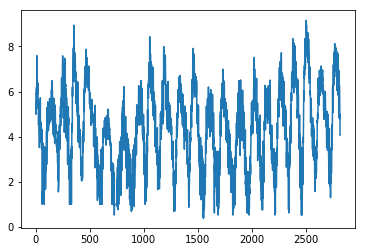

In [233]:
ax = dfnew.plot(label='observed')

In [234]:
rescaled_original = dfnew**(1/0.4)
rescaled_predicted = pred.predicted_mean**(1/0.4)


In [235]:
rescaled_predicted

2300    113.611943
2301    138.407585
2302     89.219751
2303     73.060560
2304     53.107195
2305     55.216521
2306     54.183133
2307     45.690956
2308     37.503038
2309     40.749586
2310     49.654476
2311     52.531186
2312     54.400064
2313     41.600937
2314     26.125094
2315     63.715229
2316     46.997304
2317     48.707719
2318     39.966271
2319     27.173461
2320     30.091478
2321     23.888401
2322     32.332161
2323     19.498753
2324     31.900999
2325     30.658416
2326     22.590490
2327     20.391711
2328     21.274738
2329     21.272204
           ...    
2792    318.369016
2793    265.300362
2794    382.451519
2795    297.920107
2796    250.776558
2797    268.212819
2798    309.325830
2799    256.505184
2800    233.340220
2801    227.819152
2802    202.891483
2803    286.214181
2804    302.496465
2805    271.659359
2806    265.482666
2807    280.310644
2808    292.438166
2809    247.990307
2810    209.805865
2811    156.087704
2812    174.115719
2813    192.

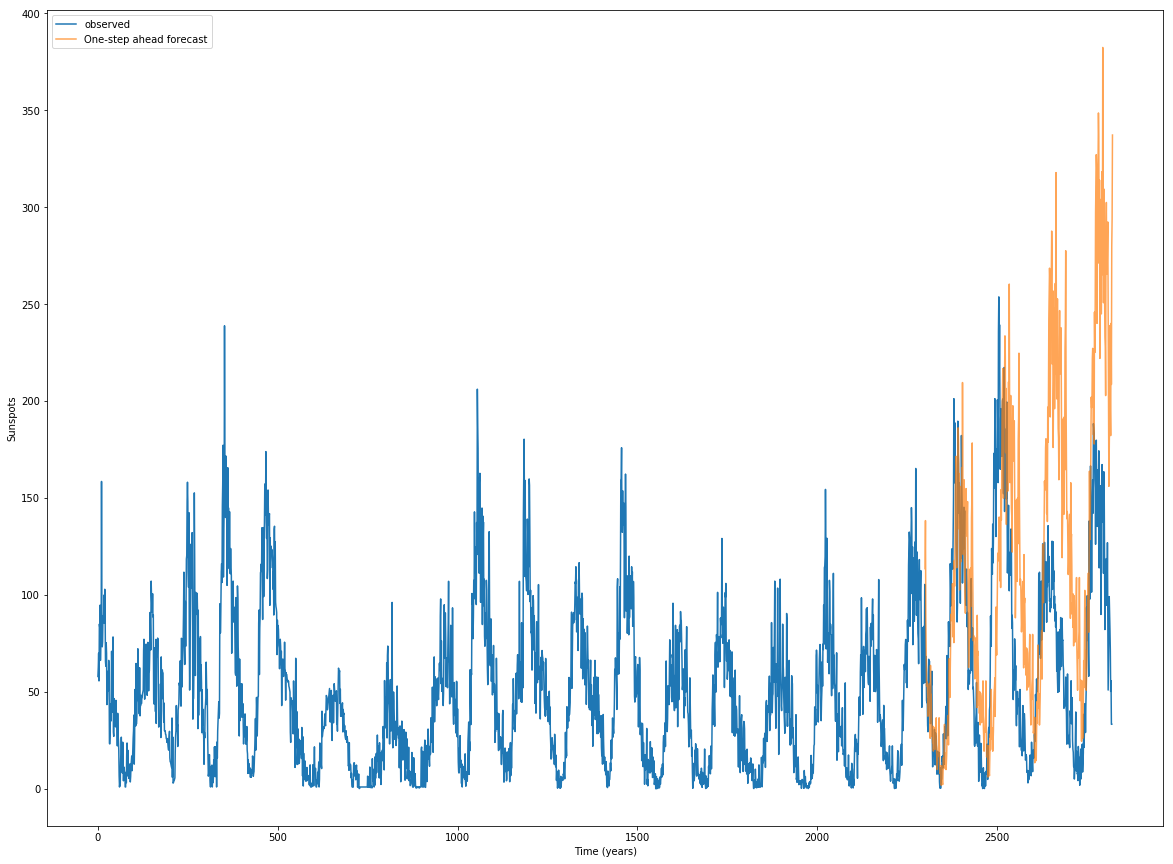

In [236]:
fig,axi = plt.subplots() 
fig.set_size_inches(20,15)
ax = rescaled_original.plot(label='observed')
rescaled_predicted.plot(ax=ax, label='One-step ahead forecast', alpha=.7)


ax.set_xlabel('Time (years)')
ax.set_ylabel('Sunspots')
plt.legend()

plt.show()

In [237]:
mte_forecast = pred.predicted_mean
mte_truth = rescaled_original[2300:]

# Compute the mean square error
mse = ((mte_forecast - mte_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(mse)))

The Mean Squared Error (MSE) of the forecast is 7905.65
The Root Mean Square Error (RMSE) of the forcast: 88.9137


In [238]:
arima_rmse = np.sqrt(mse)

# DCNN

In [298]:
df1 = pd.read_csv("C:/Users/karna/Downloads/z.csv")
df1.head()

,Month,Sunspot
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [299]:
df1 = df1.dropna()

In [300]:
df1.Month = pd.to_datetime(df1.iloc[:,0]) 

In [301]:
df1['month_year'] = df1.Month.dt.to_period('M')

In [302]:
df1.Month = df1.month_year

In [303]:
df1 = df1.drop(['month_year'],axis=1)

In [304]:
data_start_date = df1.iloc[0,0]
data_end_date = df1.iloc[df1.shape[0]-1,0]
print('Data ranges from %s to %s' % (data_start_date, data_end_date))

Data ranges from 1749-01 to 1983-12


In [305]:
from datetime import timedelta

pred_steps = 500

first_day = data_start_date 
last_day = data_end_date

val_pred_start = last_day - pred_steps 
val_pred_end = last_day - 1

train_pred_start = val_pred_start - pred_steps
train_pred_end = val_pred_start - 1

In [306]:
enc_length = train_pred_start - first_day

train_enc_start = first_day
train_enc_end = train_enc_start + enc_length - 1

val_enc_start = train_enc_start + pred_steps 
val_enc_end = val_enc_start + enc_length - 1

In [307]:

print('Train encoding:', train_enc_start, '-', train_enc_end)
print('Train prediction:', train_pred_start, '-', train_pred_end, '\n')
print('Val encoding:', val_enc_start, '-', val_enc_end)
print('Val prediction:', val_pred_start, '-', val_pred_end)



Train encoding: 1749-01 - 1900-07
Train prediction: 1900-08 - 1942-03 

Val encoding: 1790-09 - 1942-03
Val prediction: 1942-04 - 1983-11


In [308]:
date_to_index = pd.Series(index=pd.Index([c for c in df1.iloc[:,0]]),
                          data=[i for i in range(len(df1.iloc[:,0]))])

series_array = df1.iloc[:,1]

def get_time_block_series(series_array, date_to_index, start_date, end_date):
    
    inds = date_to_index[start_date:end_date]
    return series_array[inds]

def transform_series_encode(series_array):
    
  
    series_mean = series_array.mean(axis=0) 
    series_array = series_array 
    series_array = series_array.reshape((1,series_array.shape[0], 1))
    
    return series_array, series_mean

def transform_series_decode(series_array, encode_series_mean):

    series_array = series_array 
    series_array = series_array.reshape((1,series_array.shape[0],1))
    
    return series_array

In [309]:
from keras.models import Model
from keras.layers import Input, Conv1D, Dense, Dropout, Lambda, concatenate
from keras.optimizers import Adam

# convolutional layer parameters
n_filters = 512 
filter_width = 2
dilation_rates = [2**i for i in range(8)] 

# define an input history series and pass it through a stack of dilated causal convolutions. 
history_seq = Input(shape=(None, 1))
x = history_seq

for dilation_rate in dilation_rates:
    x = Conv1D(filters=n_filters,
               kernel_size=filter_width, 
               padding='causal',
               dilation_rate=dilation_rate)(x)

x = Dense(2000, activation='relu')(x)
x = Dense(1)(x)


def slice(x, seq_length):
    return x[:,-seq_length:,:]

pred_seq_train = Lambda(slice, arguments={'seq_length':500})(x)

model = Model(history_seq, pred_seq_train)

In [310]:
first_n_samples = 3000
epochs = 100


# sample of series from train_enc_start to train_enc_end  
encoder_input_data = get_time_block_series(series_array, date_to_index, 
                                           train_enc_start, train_enc_end)
encoder_input_data, encode_series_mean = transform_series_encode(encoder_input_data)

# sample of series from train_pred_start to train_pred_end 
decoder_target_data = get_time_block_series(series_array, date_to_index, 
                                            train_pred_start, train_pred_end)
decoder_target_data = transform_series_decode(decoder_target_data, encode_series_mean)


# we append a lagged history of the target series to the input data, 
# so that we can train with teacher forcing
lagged_target_history = decoder_target_data[:,:-1,:1]

encoder_input_data = np.concatenate([encoder_input_data, lagged_target_history], axis=1)
print(encoder_input_data.shape,decoder_target_data.shape)
model.compile(Adam(lr=0.0001), loss='mean_absolute_error')
history = model.fit(encoder_input_data, decoder_target_data,
                    epochs=epochs)

C:\Users\karna\Anaconda\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()
C:\Users\karna\Anaconda\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


(1, 2318, 1) (1, 500, 1)
Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 44.6344
Epoch 2/100
1/1 [==============================] - 1s 771ms/step - loss: 35.6864
Epoch 3/100
1/1 [==============================] - 1s 814ms/step - loss: 28.1411
Epoch 4/100
1/1 [==============================] - 1s 809ms/step - loss: 24.5317
Epoch 5/100
1/1 [==============================] - 1s 866ms/step - loss: 24.1125
Epoch 6/100
1/1 [==============================] - 1s 955ms/step - loss: 17.8438
Epoch 7/100
1/1 [==============================] - 1s 945ms/step - loss: 17.8984
Epoch 8/100
1/1 [==============================] - 1s 926ms/step - loss: 19.2450
Epoch 9/100
1/1 [==============================] - 1s 957ms/step - loss: 16.9452
Epoch 10/100
1/1 [==============================] - 1s 830ms/step - loss: 16.3072
Epoch 11/100
1/1 [==============================] - 1s 884ms/step - loss: 15.8500
Epoch 12/100
1/1 [==============================] - 1s 937ms/step - loss: 13.9565
Epo

In [311]:
def predict_sequence(input_sequence):

    history_sequence = input_sequence.copy()
    pred_sequence = np.zeros((1,pred_steps+2,1)) # initialize output (pred_steps time steps)  
    
    for i in range(pred_steps+2):
        
        # record next time step prediction (last time step of model output) 
        last_step_pred = model.predict(history_sequence)[0,-1,0]
        pred_sequence[0,i,0] = last_step_pred
        
        # add the next time step prediction to the history sequence
        history_sequence = np.concatenate([history_sequence, 
                                           last_step_pred.reshape(-1,1,1)], axis=1)

    return pred_sequence

In [319]:
def predict_and_plot(encoder_input_data, decoder_target_data, sample_ind, enc_tail_len=3000):


    
    encode_series = encoder_input_data[sample_ind:sample_ind+1,:,:] 
    pred_series = predict_sequence(encode_series)
    
    decoder_target_data = get_time_block_series(series_array, date_to_index, 
                                            val_pred_start-1, val_pred_end+1)
    decoder_target_data = transform_series_decode(decoder_target_data, encode_series_mean)
    
    encode_series = encode_series.reshape(-1,1)
    pred_series = pred_series.reshape(-1,1)   
    target_series = decoder_target_data[sample_ind,:,:1].reshape(-1,1) 
    
    encode_series_tail = np.concatenate([encode_series[-enc_tail_len:],target_series[:1]])
    x_encode = encode_series_tail.shape[0]
  
    plt.figure(figsize=(10,6))   
    
    plt.plot(range(1,x_encode+1),encode_series_tail)
    plt.plot(range(x_encode,x_encode+pred_steps+2),target_series,color='orange')
    plt.plot(range(x_encode,x_encode+pred_steps+2),pred_series[:],color='teal',linestyle='--')
    plt.xlabel("Time(in Years)")
    plt.ylabel("No. of Sunspots")
    
    plt.title('Sunspots Data')
    plt.legend(['Original Series','Target Series','Predictions'])

C:\Users\karna\Anaconda\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


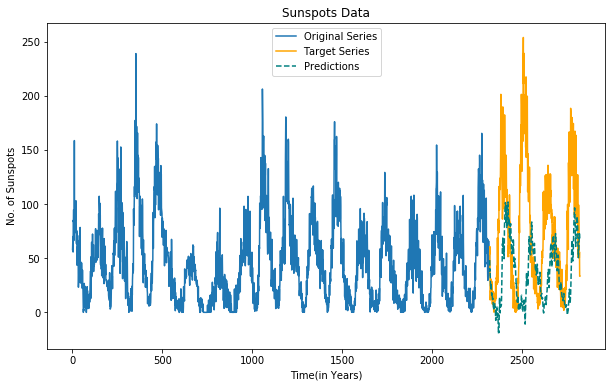

In [320]:
predict_and_plot(encoder_input_data, decoder_target_data, 0)

In [314]:
encode_series = encoder_input_data[0:1,:,:] 

pred_series = predict_sequence(encode_series)
pred_series = pred_series.reshape(-1,1)

mte_truth = df1.iloc[2318:,1]
mte_truth = mte_truth.values.reshape(-1,1)

# Compute the mean square error
mse = ((pred_series - mte_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {}'
      .format(np.sqrt(sum((pred_series - mte_truth)**2)/len(mte_forecast))))

The Mean Squared Error (MSE) of the forecast is 5508.3
The Root Mean Square Error (RMSE) of the forcast: [72.78222009]


In [315]:
DCNN_rmse = np.sqrt(mse)

# LSTM

In [257]:
import math

In [258]:
ap = pd.read_csv("C:/Users/karna/Downloads/z.csv",usecols=[1])

In [259]:
ap=ap.dropna()
ap.shape

(2820, 1)

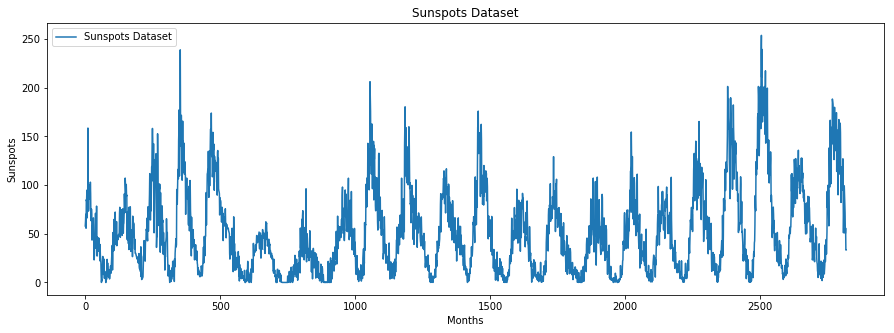

In [260]:
plt.figure(figsize = (15, 5))
plt.plot(ap, label = "Sunspots Dataset")
plt.xlabel("Months")
plt.ylabel("Sunspots")
plt.title("Sunspots Dataset")
plt.legend()
plt.show()

In [261]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

In [262]:
ap = ap.values.astype("float32")
type(ap)

numpy.ndarray

In [263]:
scaler = MinMaxScaler(feature_range = (0, 1))
ap_scaled = scaler.fit_transform(ap)
type(ap_scaled)
len(ap_scaled)

2820

In [264]:
train_size = 2299
test_size = len(ap_scaled) - train_size
train, test = ap_scaled[0:train_size, :], ap_scaled[train_size:len(ap_scaled), :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (2299, 521)


In [265]:
def create_dataset(dataset, window_size = 1):
    data_X = dataset[:(len(dataset) - window_size)]
    data_Y = np.roll(dataset, -1)[:-1]
    return(data_X, data_Y.reshape(len(data_Y),))

In [266]:
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

Original training data shape:
(2298, 1)
(2298,)
(520, 1)
(520,)


In [267]:
# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)
print(test_X.shape)


New training data shape:
(2298, 1, 1)
(520, 1, 1)


In [268]:
def fit_model(train_X, train_Y, window_size = 1):
    model = Sequential()
    
    model.add(LSTM(5, 
                   input_shape = (1, window_size)))
    model.add(Dense(1))
    model.compile(loss = "mean_squared_error", 
                  optimizer = "adam")
    model.fit(train_X, 
              train_Y, 
              epochs = 10, 
              batch_size = 1, 
              verbose = 2)
    
    return(model)


In [269]:
model_ap = fit_model(train_X, train_Y, window_size)

Epoch 1/10
 - 4s - loss: 0.0177
Epoch 2/10
 - 4s - loss: 0.0046
Epoch 3/10
 - 3s - loss: 0.0043
Epoch 4/10
 - 3s - loss: 0.0043
Epoch 5/10
 - 3s - loss: 0.0043
Epoch 6/10
 - 3s - loss: 0.0042
Epoch 7/10
 - 3s - loss: 0.0042
Epoch 8/10
 - 3s - loss: 0.0042
Epoch 9/10
 - 3s - loss: 0.0042
Epoch 10/10
 - 3s - loss: 0.0041


In [270]:
def predict_and_score(model, X, Y):
    # Make predictions on the original scale of the data.
    pred = scaler.inverse_transform(model.predict(X))
    # Prepare Y data to also be on the original scale for interpretability.
    orig_data = scaler.inverse_transform([Y])
    # Calculate RMSE.
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)

rmse_train, train_predict = predict_and_score(model_ap, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model_ap, test_X, test_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

Training data score: 16.15 RMSE
Test data score: 20.02 RMSE


In [271]:
LSTM_rmse = rmse_test

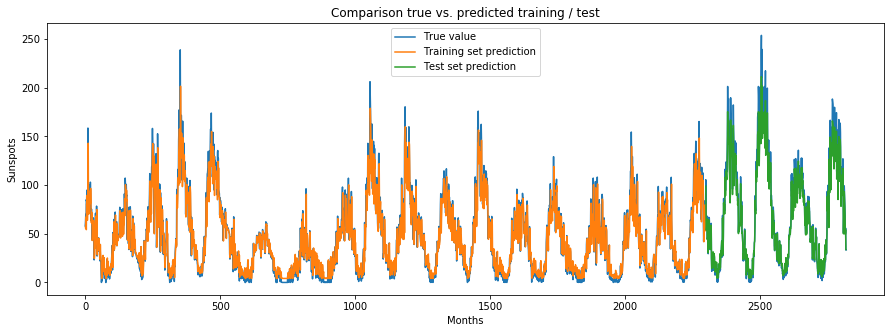

In [272]:
# Start with training predictions.
train_predict_plot = np.empty_like(ap_scaled)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

# Add test predictions.
test_predict_plot = np.empty_like(ap_scaled)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + window_size:len(ap_scaled) - 1, :] = test_predict
# Create the plot.
plt.figure(figsize = (15, 5))
plt.plot(scaler.inverse_transform(ap_scaled), label = "True value")
plt.plot(train_predict_plot, label = "Training set prediction")
plt.plot(test_predict_plot, label = "Test set prediction")
plt.xlabel("Months")
plt.ylabel("Sunspots")
plt.title("Comparison true vs. predicted training / test")
plt.legend()
plt.show()

# XGBOOST

In [273]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import imageio
import os
from statsmodels.graphics.tsaplots import plot_acf

In [274]:
df1 = pd.read_csv("C:/Users/karna/Downloads/z.csv",index_col=[0])
df1.head()

,Sunspot
Month,
1749-01,58.0
1749-02,62.6
1749-03,70.0
1749-04,55.7
1749-05,85.0


In [275]:
df1.isna().sum()

Sunspot    0
dtype: int64

In [276]:
df1 = df1.dropna()

df1.reset_index(inplace=True)

df1['Month'] = pd.to_datetime(df1['Month'])

df1 = df1.set_index('Month')

In [277]:
def split_data(data, split_date):
    return data[data.index <= split_date].copy(), \
           data[data.index >  split_date].copy()

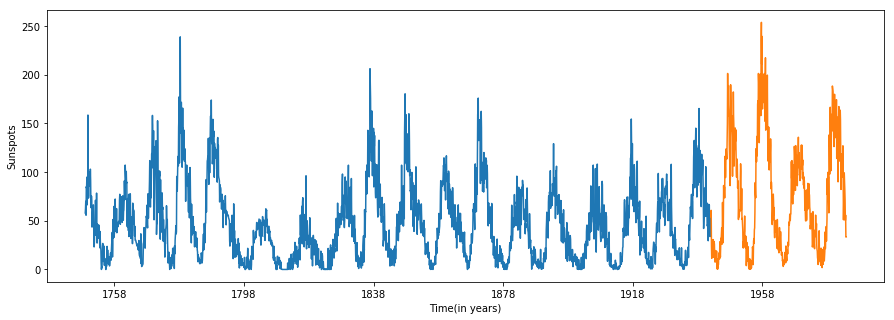

In [278]:
train, test = split_data(df1,'1942-02')

plt.figure(figsize=(15,5))
plt.xlabel('Time(in years)')
plt.ylabel('Sunspots')
plt.plot(train.index,train)
plt.plot(test.index,test)
plt.show()

In [279]:
train.iloc[:,0].shape

(2318,)

In [280]:
import statsmodels
result = statsmodels.tsa.seasonal.seasonal_decompose(df1)

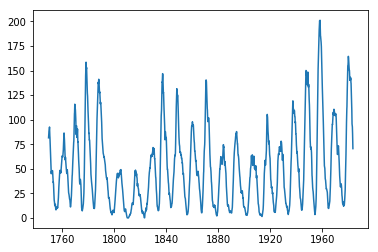

In [281]:
plt.plot(result.trend)

In [282]:
def create_features(df):
    df['date'] = df.index
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    

    df['seasonal'] = result.seasonal
    df['trend'] = result.trend
    X = df[['year','month','seasonal','trend']]

    return X

In [283]:
X_train, y_train = create_features(train), train.iloc[:,0]
X_test, y_test   = create_features(test), test.iloc[:,0]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2318, 4), (2318,), (502, 4), (502,))

In [284]:
import xgboost as xgb


# define eval metrics
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat/y-1) ** 2))



params = {"objective": "reg:linear", # for linear regression
          "booster" : "gbtree",   # use tree based models 
          "eta": 0.75,   # learning rate
          "max_depth": 3,    # maximum depth of a tree
          "subsample": 0.9,    # Subsample ratio of the training instances
          "colsample_bytree": 0.7,   # Subsample ratio of columns when constructing each tree
          "silent": 1,   # silent mode
          "seed": 21,   # Random number seed
          "base_score": 0.5
          }
num_boost_round = 4000

dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_test, y_test)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
# train the xgboost model
model = xgb.train(params, dtrain, num_boost_round,evals=watchlist, \
  early_stopping_rounds= 1000, verbose_eval=True)

[0]	train-rmse:35.4516	eval-rmse:74.2923
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 1000 rounds.
[1]	train-rmse:18.8666	eval-rmse:41.8533
[2]	train-rmse:15.9692	eval-rmse:30.1963
[3]	train-rmse:15.1892	eval-rmse:29.697
[4]	train-rmse:14.5749	eval-rmse:23.3898
[5]	train-rmse:13.9808	eval-rmse:23.5763
[6]	train-rmse:13.8639	eval-rmse:23.796
[7]	train-rmse:13.6413	eval-rmse:19.6806
[8]	train-rmse:13.5425	eval-rmse:19.4702
[9]	train-rmse:13.3076	eval-rmse:19.208
[10]	train-rmse:13.1654	eval-rmse:19.1724
[11]	train-rmse:13.0203	eval-rmse:18.4443
[12]	train-rmse:12.9467	eval-rmse:18.3031
[13]	train-rmse:12.8691	eval-rmse:18.3033
[14]	train-rmse:12.7603	eval-rmse:18.4425
[15]	train-rmse:12.7269	eval-rmse:18.9574
[16]	train-rmse:12.6474	eval-rmse:20.0183
[17]	train-rmse:12.5392	eval-rmse:20.0114
[18]	train-rmse:12.5312	eval-rmse:20.0638
[19]	train-rmse:12.4329	eval-rmse:20.069
[20]	train-rmse:12.3598	eval-

[191]	train-rmse:7.92962	eval-rmse:23.5416
[192]	train-rmse:7.92867	eval-rmse:23.5285
[193]	train-rmse:7.88331	eval-rmse:23.5646
[194]	train-rmse:7.84883	eval-rmse:23.5693
[195]	train-rmse:7.84299	eval-rmse:23.553
[196]	train-rmse:7.84337	eval-rmse:23.5563
[197]	train-rmse:7.83119	eval-rmse:23.5425
[198]	train-rmse:7.81122	eval-rmse:23.5301
[199]	train-rmse:7.79633	eval-rmse:23.5509
[200]	train-rmse:7.79702	eval-rmse:23.5588
[201]	train-rmse:7.79729	eval-rmse:23.5488
[202]	train-rmse:7.77722	eval-rmse:23.6001
[203]	train-rmse:7.76586	eval-rmse:23.5885
[204]	train-rmse:7.72587	eval-rmse:23.5707
[205]	train-rmse:7.69052	eval-rmse:23.5681
[206]	train-rmse:7.64846	eval-rmse:23.5346
[207]	train-rmse:7.6332	eval-rmse:23.4156
[208]	train-rmse:7.60574	eval-rmse:23.3724
[209]	train-rmse:7.59435	eval-rmse:23.3515
[210]	train-rmse:7.56932	eval-rmse:23.4018
[211]	train-rmse:7.57071	eval-rmse:23.3871
[212]	train-rmse:7.55742	eval-rmse:23.4187
[213]	train-rmse:7.5313	eval-rmse:23.4176
[214]	train-rm

[383]	train-rmse:5.7596	eval-rmse:24.2603
[384]	train-rmse:5.74679	eval-rmse:24.2952
[385]	train-rmse:5.7427	eval-rmse:24.2474
[386]	train-rmse:5.7331	eval-rmse:24.2547
[387]	train-rmse:5.71984	eval-rmse:24.2161
[388]	train-rmse:5.71639	eval-rmse:24.2671
[389]	train-rmse:5.71702	eval-rmse:24.287
[390]	train-rmse:5.71604	eval-rmse:24.3022
[391]	train-rmse:5.70592	eval-rmse:24.3075
[392]	train-rmse:5.70041	eval-rmse:24.2951
[393]	train-rmse:5.69991	eval-rmse:24.2984
[394]	train-rmse:5.69182	eval-rmse:24.3114
[395]	train-rmse:5.67287	eval-rmse:24.2895
[396]	train-rmse:5.65747	eval-rmse:24.2988
[397]	train-rmse:5.65379	eval-rmse:24.2932
[398]	train-rmse:5.64393	eval-rmse:24.2907
[399]	train-rmse:5.6265	eval-rmse:24.2977
[400]	train-rmse:5.61686	eval-rmse:24.2911
[401]	train-rmse:5.60914	eval-rmse:24.2785
[402]	train-rmse:5.60297	eval-rmse:24.2647
[403]	train-rmse:5.59101	eval-rmse:24.2693
[404]	train-rmse:5.57519	eval-rmse:24.272
[405]	train-rmse:5.57016	eval-rmse:24.1684
[406]	train-rmse:

[575]	train-rmse:4.42288	eval-rmse:24.0608
[576]	train-rmse:4.40508	eval-rmse:24.0459
[577]	train-rmse:4.40078	eval-rmse:24.0455
[578]	train-rmse:4.39484	eval-rmse:24.0341
[579]	train-rmse:4.39498	eval-rmse:24.0461
[580]	train-rmse:4.38634	eval-rmse:24.0729
[581]	train-rmse:4.3796	eval-rmse:24.0751
[582]	train-rmse:4.37941	eval-rmse:24.0672
[583]	train-rmse:4.37936	eval-rmse:24.0773
[584]	train-rmse:4.37427	eval-rmse:24.4532
[585]	train-rmse:4.35864	eval-rmse:24.4405
[586]	train-rmse:4.34636	eval-rmse:24.4508
[587]	train-rmse:4.34663	eval-rmse:24.4334
[588]	train-rmse:4.34241	eval-rmse:24.4356
[589]	train-rmse:4.3395	eval-rmse:24.6603
[590]	train-rmse:4.32516	eval-rmse:24.6506
[591]	train-rmse:4.32317	eval-rmse:24.6529
[592]	train-rmse:4.31456	eval-rmse:24.6621
[593]	train-rmse:4.30962	eval-rmse:24.6204
[594]	train-rmse:4.30464	eval-rmse:24.6188
[595]	train-rmse:4.30488	eval-rmse:24.6371
[596]	train-rmse:4.30167	eval-rmse:24.6711
[597]	train-rmse:4.29737	eval-rmse:24.6912
[598]	train-r

[767]	train-rmse:3.54459	eval-rmse:24.2833
[768]	train-rmse:3.53072	eval-rmse:24.2864
[769]	train-rmse:3.52616	eval-rmse:24.2821
[770]	train-rmse:3.52376	eval-rmse:24.3138
[771]	train-rmse:3.52033	eval-rmse:24.3121
[772]	train-rmse:3.517	eval-rmse:24.3136
[773]	train-rmse:3.51654	eval-rmse:24.3117
[774]	train-rmse:3.51696	eval-rmse:24.3302
[775]	train-rmse:3.51515	eval-rmse:24.3221
[776]	train-rmse:3.5144	eval-rmse:24.4061
[777]	train-rmse:3.51392	eval-rmse:24.4009
[778]	train-rmse:3.50368	eval-rmse:24.4013
[779]	train-rmse:3.50303	eval-rmse:24.4409
[780]	train-rmse:3.50145	eval-rmse:24.4402
[781]	train-rmse:3.50005	eval-rmse:24.4548
[782]	train-rmse:3.49974	eval-rmse:24.4548
[783]	train-rmse:3.49626	eval-rmse:24.4482
[784]	train-rmse:3.49145	eval-rmse:24.4425
[785]	train-rmse:3.4916	eval-rmse:24.4418
[786]	train-rmse:3.48846	eval-rmse:24.4529
[787]	train-rmse:3.48599	eval-rmse:24.4191
[788]	train-rmse:3.48082	eval-rmse:24.4218
[789]	train-rmse:3.4752	eval-rmse:24.4234
[790]	train-rmse

[959]	train-rmse:2.93564	eval-rmse:24.4989
[960]	train-rmse:2.93454	eval-rmse:24.4934
[961]	train-rmse:2.93142	eval-rmse:24.4995
[962]	train-rmse:2.92216	eval-rmse:24.4932
[963]	train-rmse:2.91362	eval-rmse:24.4921
[964]	train-rmse:2.9089	eval-rmse:24.4942
[965]	train-rmse:2.89437	eval-rmse:24.5024
[966]	train-rmse:2.89115	eval-rmse:24.5013
[967]	train-rmse:2.88953	eval-rmse:24.4999
[968]	train-rmse:2.87967	eval-rmse:24.5035
[969]	train-rmse:2.87764	eval-rmse:24.507
[970]	train-rmse:2.87659	eval-rmse:24.5105
[971]	train-rmse:2.87014	eval-rmse:24.5022
[972]	train-rmse:2.86394	eval-rmse:24.497
[973]	train-rmse:2.86417	eval-rmse:24.4995
[974]	train-rmse:2.86305	eval-rmse:24.511
[975]	train-rmse:2.86028	eval-rmse:24.5181
[976]	train-rmse:2.85911	eval-rmse:24.5201
[977]	train-rmse:2.85744	eval-rmse:24.4897
[978]	train-rmse:2.85629	eval-rmse:24.5008
[979]	train-rmse:2.85509	eval-rmse:24.5622
[980]	train-rmse:2.8476	eval-rmse:24.5597
[981]	train-rmse:2.84275	eval-rmse:24.5497
[982]	train-rmse

In [285]:
def plot_performance(base_data, date_from, date_to, title=None):
    plt.figure(figsize=(15,3))
    if title == None:
        plt.title('From {0} To {1}'.format(date_from, date_to))
    else:
        plt.title(title)
    plt.xlabel('Time(in Years)')
    plt.ylabel('Sunspots')
    plt.plot(df1.index,df1, label='data')
    plt.plot(X_train.index,x_pred, label='train prediction')
    plt.plot(X_test.index,y_pred, label='test prediction')
    plt.legend()
    plt.xlim(left=date_from, right=date_to)

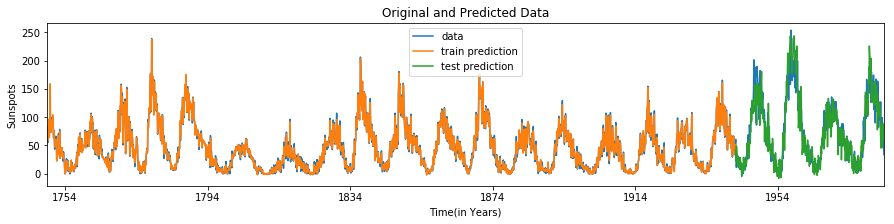

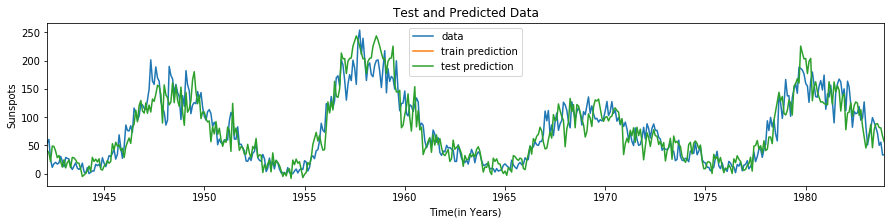

In [286]:
y_pred = model.predict(xgb.DMatrix(X_test))
x_pred = model.predict(xgb.DMatrix(X_train))
plot_performance(df1, df1.index[0].date(), df1.index[-1].date(),
                 'Original and Predicted Data')


plot_performance(y_test, y_test.index[0].date(), y_test.index[-1].date(),
                 'Test and Predicted Data')




plt.legend()

plt.show()

In [287]:
print("RMSE",np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred)))

RMSE 24.547399590725348


In [288]:
XGBOOST_rmse = np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred))

In [289]:
df2 = df.copy()

In [290]:
df1 = df1.dropna()

df1.reset_index(inplace=True)

df1['Month'] = pd.to_datetime(df1['Month'])

df1 = df1.set_index('Month')

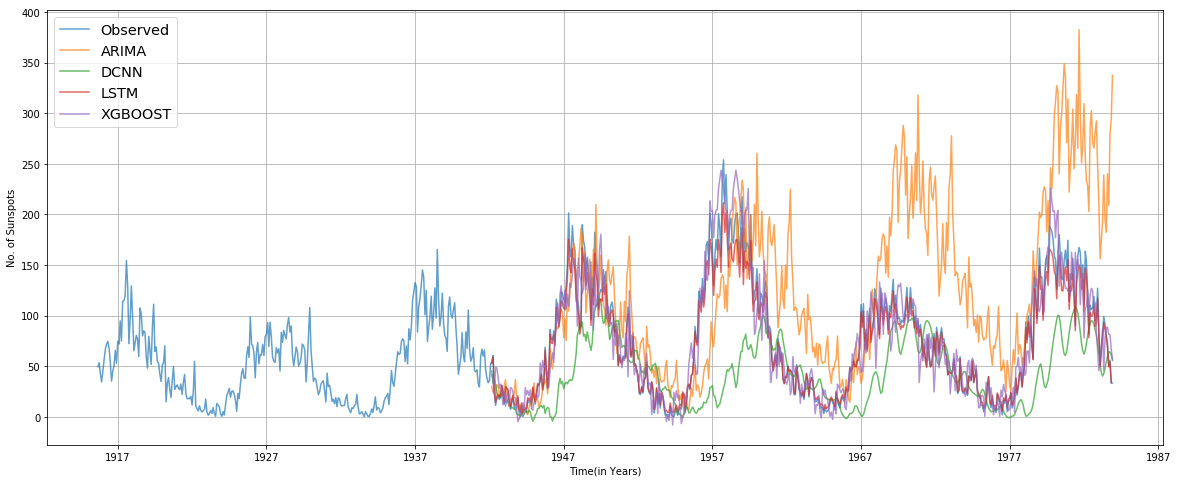

In [291]:
arima = rescaled_original
arima_predicted = rescaled_predicted

fig,axi = plt.subplots() 
fig.set_size_inches(20,8)
plt.plot(df1.index[2000:],arima[2000:],label='Observed',alpha=0.7)
plt.plot(df1.index[2318:],arima_predicted[20:],label='ARIMA',alpha=0.7)
plt.plot(df1.index[2318:],pred_series,label='DCNN',alpha=0.7)
plt.plot(df1.index[2318:],test_predict_plot[2318:],label="LSTM",alpha=0.7)
plt.plot(df1.index[2318:],y_pred,label='XGBOOST',alpha=0.7)
plt.xlabel("Time(in Years)")
plt.ylabel("No. of Sunspots")

plt.legend(fontsize='x-large')
plt.grid()

In [292]:
RMSE = []
RMSE.append(arima_rmse)
RMSE.append(DCNN_rmse)
RMSE.append(LSTM_rmse)
RMSE.append(XGBOOST_rmse)

In [294]:
x = np.asarray(RMSE)

Text(0,0.5,'RMSE values')

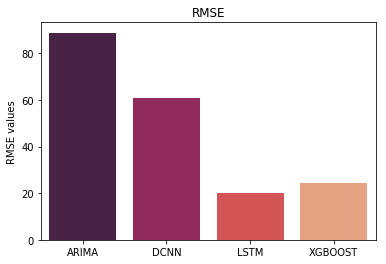

In [295]:
import seaborn as sns

sns.barplot(x=['ARIMA','DCNN','LSTM','XGBOOST'],y=x, palette="rocket")
plt.title("RMSE")
plt.ylabel("RMSE values")